In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sqlite3 as sq
import pandas as pd

# Problem 1

## 1

The number of objects can easily be checked by counting the length of the Stars view, which I did by entering the following query into CasJobs:


    SELECT 
      COUNT(*)
  
    FROM 
      Star
  
    INTO
      mydb.starcount
  
This returns a total of 260562744 stars.

Similarly, the number of observations and the average observed color in any given band band can be calculated with

    SELECT
      COUNT(s.dered_x), AVG(s.dered_x)
  
    FROM
      Star as s
  
    INTO 
      mydb.x_info
  
However, this includes observations with missing data (which is dilineated by -9999). This can be addressed by appending 

    WHERE
      s.dered_x > 0
  
to the query after the FROM statement.
  
This returns a total of 259257394 observations in u, 259674707 observations in g, 259944363 observations in r, 260106524 observations in i, and 260240892 observations in z, as well as average magnitudes of 22.04 in u, 21.24 in g, 20.41 in r, 19.85 in i and 19.48 in z.

## 2

Selecting positions and magnitudes is simple enough using the query

    SELECT
      s.ra ra, s.dec dec,
      s.dered_g g, s.dered_r r

    FROM
      Star s 
  
    WHERE 
      225 < ra and ra < 235
      and -2.5 < dec and dec < 4
      and g > 0
      and r > 0

    INTO
      mydb.pos1
  
The resulting table in MyDB can then be downloaded, read into iPython, and stored in a local sqlite database ('sdss.db') with the following code:

In [3]:
from astropy.table import Table
con = sq.connect('sdss.db')

In [11]:
pos1 = Table.read('pos1_tzdw.fit')
pospd = pd.DataFrame(np.array(pos1))
pospd.to_sql('pos1',con,if_exists='replace')

,ra,dec,g,r
0,227.999733,-1.104298,16.626780,16.224546
1,227.362903,-1.134954,16.889559,13.699831
2,227.358036,-1.113322,24.977209,24.220699
3,227.364424,-1.119422,24.259232,22.760517
4,227.367330,-1.117900,24.734415,23.994379
5,227.365088,-1.118641,22.777231,22.255520
6,226.098209,-1.244919,22.828218,21.400629
7,226.097717,-1.166791,20.845758,20.313383
8,226.096100,-1.187618,22.944992,22.920855
9,226.960989,-1.092508,23.395645,22.092121


## 3

We can now plot a R.A. vs. Dec scatter plot of our stars with

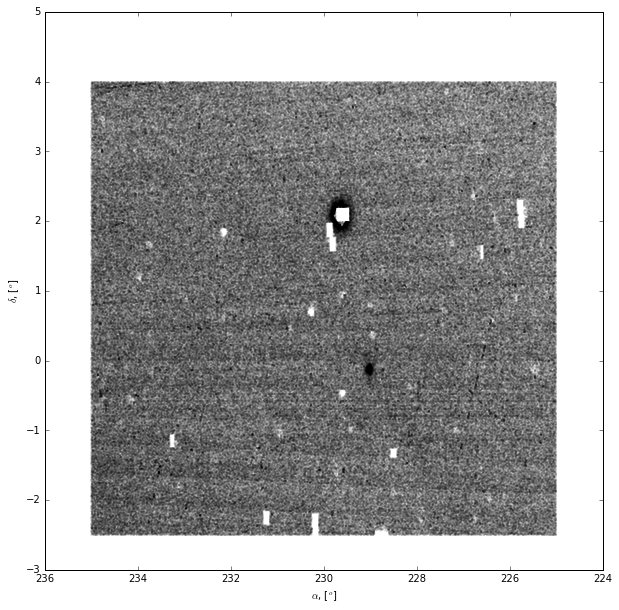

In [15]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(pos1['ra'],pos1['dec'],marker='.',s=0.01)
ax.invert_xaxis()
plt.xlabel(r'$\alpha$, [$^o$]')
plt.ylabel(r'$\delta$, [$^o$]')

Interestingly, there is an object at RA = 229, Dec = 0. This is the globular cluster, Palomar 5 (judging from the coordinates in the Wikipedia link in the assignment). 

## 4

Let's select a small region around Palomar 5, as well as the same sized area from the nearby sky:

In [18]:
#Using indexing operators:
#let's make a function that defines the distance between two points on the sky:
dist = lambda ra1,dec1,ra2,dec2: np.sqrt(((ra1-ra2)**2.)+((dec1-dec2)**2.))

pal5 = pos1[dist(pos1['ra'],pos1['dec'],229.,0.)<=.5] #give me everything on the sky within .5 degrees of the given coordinates
offset = pos1[dist(pos1['ra'],pos1['dec'],226.,0.)<=.5]

#now let's check that doing the same thing with SQL queries returns the same result:
sqpal5 = pd.read_sql("""
                        SELECT *
                        FROM
                        pos1
                        WHERE
                        (ra - 229)*(ra - 229)+dec*dec < .25"""
                    ,con)
sqoffset = pd.read_sql("""
                        SELECT *
                        FROM
                        pos1
                        WHERE
                        (ra - 226)*(ra - 226)+dec*dec < .25"""
                    ,con)
#If these are the same, then the lengths of the tables returned by different methods should be the same
print len(pal5),len(sqpal5),len(offset),len(sqoffset)
#And they are!

15979 15979 12790 12790


## 5

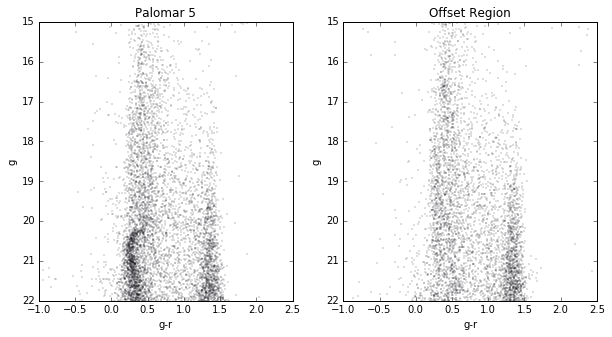

In [28]:
def add_cmd(axis,dat,title):
    g = dat['g']
    r = dat['r']
    gr = g-r
    axis.scatter(gr,g,marker='.',s=0.1)
    axis.set_xlabel('g-r')
    axis.set_ylabel('g')
    axis.set_xlim(-1,2.5)
    axis.set_ylim(22,15)
    axis.set_title(title)
    
fig, ax = plt.subplots(1,2,figsize=(10,5))
add_cmd(ax[0],pal5,'Palomar 5')
add_cmd(ax[1],offset, 'Offset Region')


The offset region appears to be very similar to the CMDs constructed for other regions in class; there appears to be a slight overdensity at g ~ 16.5, g-r ~ 0.5. The Palomar 5 looks roughly similar, however, there is a noticeable difference in the lower left; a nearly-verticle sequence with a red hook at the end. 

## 6

It seems as if these two CMDs differ most in the box defined by 20 < g < 22, 0 < g-r < 0.5. Plotting the spatial distribution of this color-magnitude box:

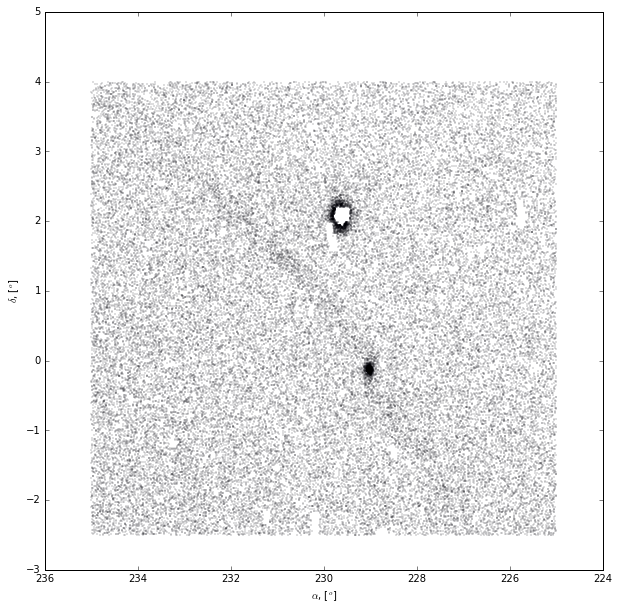

In [36]:
color_box = (pos1['g'] <= 22.) & (pos1['g'] >= 20.) & (pos1['g']-pos1['r'] >= 0.) & (pos1['g']-pos1['r'] <= 0.5)
ras = pos1['ra'][color_box]
decs = pos1['dec'][color_box]

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(ras,decs,marker='.',s=0.1)
ax.invert_xaxis()
ax.set_xlabel(r'$\alpha$, [$^o$]')
ax.set_ylabel(r'$\delta$, [$^o$]')

It appears as if there is an elongated stream of stars along the line running NE-SW from Palomar 5. Wow!

## 7

Making the selection of this box in color-magnitude space more quantitative shouldn't be too difficult. It should be easy enough to do a 2-D histogram of each CMD (binned to ensure there are enough stars in each bin, while keeping decent resolution), subtracting the arrays, and finally selecting the region in C-M space where the difference exceeds some minimum threshold number of stars.

# Problem 2

In [1]:
import os
os.environ['NWORKERS'] = '8'
os.environ['LSD_CACHEDIR'] = os.environ['HOME']+'/tempdir'
os.environ['LSD_TEMPDIR'] = os.environ['HOME']+'/tempdir'
os.environ['LSD_DB'] = os.environ['HOME']+'/lsddb:/astro/apps6/opt/lsddb'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table, Column

In [3]:
from lsd import DB
from lsd.bounds import beam, rectangle

In [29]:
! lsd-admin create table --schema hw1.yaml hw1 --drop-existing

Table 'hw1' dropped.

-------- committing 20160212213205.003169 [hw1] ---------
[hw1] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.24 sec
[hw1] Updating neighbors: Already up to date.
[hw1] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.24 sec
[hw1] Updating stats: [0 el.]>  0.00 sec
[hw1] Marking tablets read-only...
----------- success 20160212213205.003169 [hw1] ---------

Table 'hw1' created.


In [30]:
! lsd-import fits hw1 calibObj-000094-1-star.fits.gz calibObj-000094-2-star.fits.gz calibObj-000094-3-star.fits.gz calibObj-000094-4-star.fits.gz calibObj-000094-5-star.fits.gz calibObj-000094-6-star.fits.gz

Importing from 6 pieces:
  ===> Imported calibObj-000094-6-star.fits.gz                                         [1/6, 16.67%] + 138113/138113     138113 (0/1 min.)
  ===> Imported calibObj-000094-5-star.fits.gz                                         [2/6, 33.33%] + 136292/136292     274405 (0/1 min.)
  ===> Imported calibObj-000094-4-star.fits.gz                                         [3/6, 50.00%] + 130027/130027     404432 (0/0 min.)
  ===> Imported calibObj-000094-2-star.fits.gz                                         [4/6, 66.67%] + 155355/155355     559787 (0/0 min.)
  ===> Imported calibObj-000094-3-star.fits.gz                                         [5/6, 83.33%] + 124832/124832     684619 (0/0 min.)
  ===> Imported calibObj-000094-1-star.fits.gz                                         [6/6, 100.00%] + 133515/133515     818134 (0/0 min.)
done

-------- committing 20160212213211.404805 [hw1] ---------
[hw1] Updating tablet catalog: [256 el.]::::::::::::::::::::>  0.38 sec
[hw1

In [88]:
! cat hw1.yaml

# Schema for SDSS table
filters: {complevel: 5, complib: blosc}
schema:
  basic:
    primary_key: oid
    spatial_keys: [ra, dec]
    columns:
    - [oid, u8]
    - [run, i2]
    - [rerun, S3] 
    - [camcol, u1] 
    - [field, i8] 
    - [ID, i2]
    - [objc_type, i4]
    - [objc_flags, i4] 
    - [objc_flags2, i4]
    - [zhedflag, i2]
    - [objc_rowc, f4]
    - [rowvdeg, f4]
    - [rowvdegerr, f4]
    - [colvdeg, f4]
    - [colvdegerr, f4]
    - [rowc, 5f4]
    - [colc, 5f4]
    - [M_RR_CC, 5f4]
    - [M_RR_CC_PSF, 5f4]
    - [flags, 5i4]
    - [flags2, 5i4]
    - [ra, f8]
    - [dec, f8]
  photo:
    columns:
    - [SKYFLUX, 5f4]
    - [PSFFLUX, 5f4]
    - [PSFFLUX_IVAR, 5f8]
    - [MODELFLUX, 5f8]
    - [MODELFLUX_IVAR, 5f8]
    - [EXTINCTION, 5f8]
    - [FIBERFLUX, 5f8]
    - [FIBERFLUX_IVAR, 5f8]    
    - [FIBER2FLUX, 5f8]
    - [FIBER2FLUX_IVAR, 5f8]        
    - [APERFLUX6, 5f4]
  irc:
    columns:
    - [PSP_STATUS, 5i8]
    - [PSF_FWHM, 5f8]
    - [RESOLVE_STATUS, i8]
    

In [36]:
! lsd-footprint hw1 hw1_foot.fits

 [48 el.]::::::::::::::::::::>  0.39 sec
Objects: 818134.0


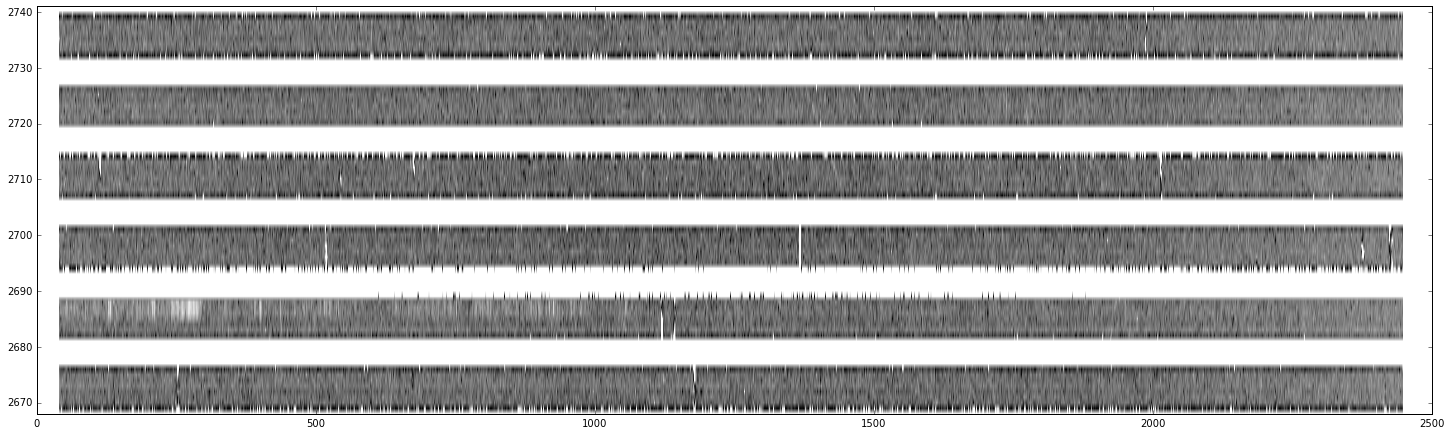

In [87]:
from astropy.io import fits
from matplotlib.colors import LogNorm

foot = fits.getdata('hw1_foot.fits')

fig, ax = plt.subplots(figsize=(25,7.3))

ax.invert_yaxis()
ax.set_ylim(2668,2741)
ax.set_xlim(0,2500)
ax.imshow(np.roll(foot,1740,axis=1),cmap='gray',norm=LogNorm(),aspect='auto')
